# Rede Neuronal para detetar diferentes tipos de doença através de raio-x de pulmões. (Covid-19, Pneumonia, Normal)

In [ ]:
#configs iniciais (colaboratory)

#from google.colab import drive
#drive.mount('/content/drive')

!unzip "covid19.zip" -d "./covid19"

In [ ]:
#bibliotecas internas
import os
import random
import gc

#bibliotecas externas
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, accuracy_score

In [ ]:
#pastas de cada conjunto de imagens - treinar
normal_dir_train="./covid19/train/NORMAL/"
pneu_dir_train="./covid19/train/PNEUMONIA/"
covid_dir_train="./covid19/train/COVID/"

#listas de imagens por cada doença (ou não) - treinar
train_normal = ['./covid19/train/NORMAL/{}'.format(i) for i in os.listdir(normal_dir_train)]
train_pneu = ['./covid19/train/PNEUMONIA/{}'.format(i) for i in os.listdir(pneu_dir_train)]
train_covid = ['./covid19/train/COVID/{}'.format(i) for i in os.listdir(covid_dir_train)]

#pastas de cada conjunto de imagens - teste
normal_dir_test="./covid19/test/NORMAL/"
pneu_dir_test="./covid19/test/PNEUMONIA/"
covid_dir_test="./covid19/test/COVID/"

#listas de imagens por cada doença (ou não) - teste
test_normal = ['./covid19/test/NORMAL/{}'.format(i) for i in os.listdir(normal_dir_test)]
test_pneu = ['./covid19/test/PNEUMONIA/{}'.format(i) for i in os.listdir(pneu_dir_test)]
test_covid = ['./covid19/test/COVID/{}'.format(i) for i in os.listdir(covid_dir_test)]

#lista de fotos para teste (junção dos raios-x dos três tipos de condições)
train_imgs = train_normal  + train_pneu + train_covid
test_imgs = test_normal  + test_pneu + test_covid

#dispor aleatoriamente as imagens
random.shuffle(train_imgs)
random.shuffle(test_imgs)

#eliminar dados que não serao reutilizados
del train_covid
del train_normal
del train_pneu
del test_covid
del test_normal
del test_pneu

#retirar dados eliminados da memoria
gc.collect()

0

In [ ]:
#definir tamanho das imagens
nlinhas = 256
ncolunas = 256
canais = 3  #dimensões das cores (1 para preto e branco e 3 para colorido)


# Função para Colocar fotos no formato correto
def processar_imagens(lista_de_imagens):

    X = [] # imagens
    y = [] # categorias

    for imagem in lista_de_imagens:

        imagem_cor = cv2.resize(cv2.imread(imagem, cv2.IMREAD_COLOR), (nlinhas,ncolunas), interpolation=cv2.INTER_CUBIC) # Ler imagens a cores (256x256x3)

        # inserir imagem no array das imagens
        if canais == 1:
          imagem_peb = cv2.cvtColor(imagem_cor, cv2.COLOR_BGR2GRAY) # converter imagens a preto e branco
          X.append(imagem_peb)
        elif canais == 3:
          X.append(imagem_cor)

        # dividir imagens por categoria
        if "NORMAL" in os.path.split(imagem)[0]:
            y.append(0)
        elif "PNEUMONIA" in os.path.split(imagem)[0]:
            y.append(1)
        elif "COVID" in os.path.split(imagem)[0]:
            y.append(2)

    return X, y

In [ ]:
#executar função para processar imagens e obter as variaveis
X_train, y_train = processar_imagens(train_imgs)
X_test, y_test = processar_imagens(test_imgs)

#retirar dados eliminados da memoria
gc.collect()

print(X_train[0].shape) #dimensoes da imagem
print(X_test[0].shape) #dimensoes da imagem

(256, 256, 3)
(256, 256, 3)


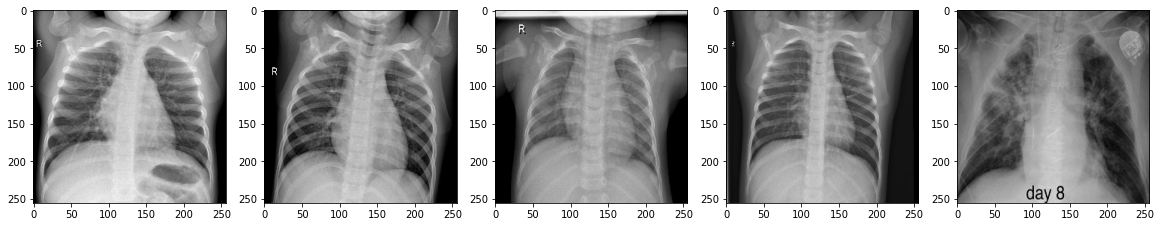

In [ ]:
#mostrar figuras
plt.figure(figsize=(20,10))
columns = 5

for i in range(columns):
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(X_train[i], cmap='gray', vmin=0, vmax=255)

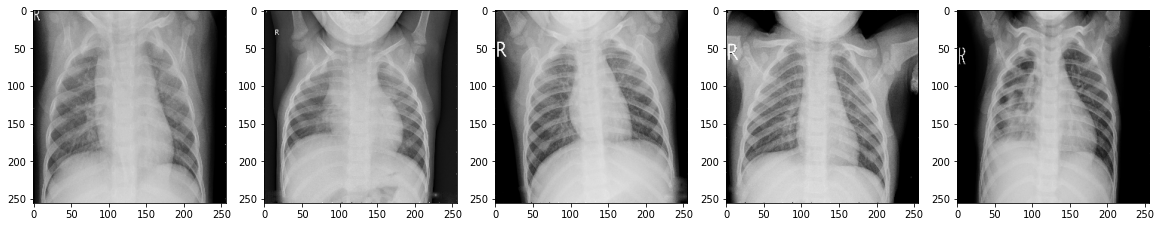

In [ ]:
plt.figure(figsize=(20,10))
for i in range(columns):
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(X_test[i], cmap='gray', vmin=0, vmax=255)

Legenda:
0 - NORMAL, 1 - PNEUMONIA, 2 - COVID


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Tipo de Doença')

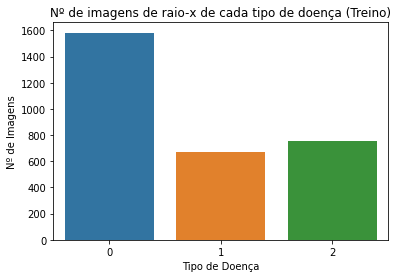

In [ ]:
#eliminar arrays com as imagens
del train_imgs
del test_imgs
gc.collect()

#Converter para uma array do numpy
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

#Plotar imagens pelo tipo de doenças
print("Legenda:")
print("0 - NORMAL, 1 - PNEUMONIA, 2 - COVID")
sns.countplot(y_train)
plt.title('Nº de imagens de raio-x de cada tipo de doença (Treino)')
plt.ylabel("Nº de Imagens")
plt.xlabel("Tipo de Doença")

Legenda:
0 - NORMAL, 1 - PNEUMONIA, 2 - COVID


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Tipo de Doença')

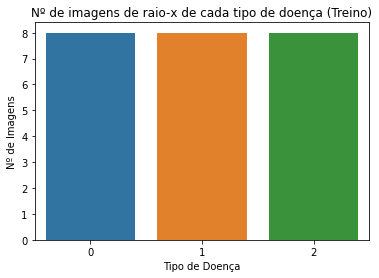

In [ ]:
print("Legenda:")
print("0 - NORMAL, 1 - PNEUMONIA, 2 - COVID")
sns.countplot(y_test)
plt.title('Nº de imagens de raio-x de cada tipo de doença (Treino)')
plt.ylabel("Nº de Imagens")
plt.xlabel("Tipo de Doença")

In [ ]:
# Dimensão de cada lista de dados (x,y)
print("Formato da imagens de treino:", X_train.shape)
print("Formato da identificação das diferentes imagens de treino:", y_train.shape)

print("Formato da imagens de teste:", X_test.shape)
print("Formato da identificação das diferentes imagens de teste:", y_test.shape)

Formato da imagens de treino: (3010, 256, 256, 3)
Formato da identificação das diferentes imagens de treino: (3010,)
Formato da imagens de teste: (24, 256, 256, 3)
Formato da identificação das diferentes imagens de teste: (24,)


***Inteligência*** ***Artificial***







In [ ]:
num_classes=3
input_shape = (256, 256, 3) # 256x256x1 - preto e branco / 256x256x3 - cores

dummies = pd.get_dummies(y_train) # atribuir um numero para cada classe (doença)
y_train = dummies.values

dummies = pd.get_dummies(y_test) # atribuir um numero para cada classe (doença)
y_test = dummies.values

In [ ]:
# Escalar imagens entre [0, 1]
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Dimensões do X
print("Forma y_train:", y_train.shape)
print("Forma x_train:", X_train.shape)

# Numero de exemplos
print(X_train.shape[0], "dados de treino")
print(X_test.shape[0], "dados de teste")

Forma y_train: (3010, 3)
Forma x_train: (3010, 256, 256, 3)
3010 dados de treino
24 dados de teste


[1 0 0]


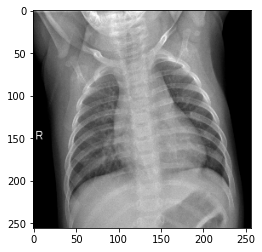

In [ ]:
# mostrar imagem e valor
plt.imshow(X_train[100].squeeze())
print(y_train[100])

[0 1 0]


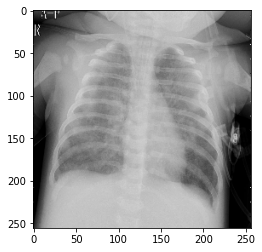

In [ ]:
plt.imshow(X_test[5].squeeze())
print(y_test[5])

In [ ]:
# modelo de rede neuronal
model = keras.Sequential(
        [
        keras.Input(shape=input_shape),
        layers.ZeroPadding2D(padding=(1, 1)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu",padding='same'),
        layers.ZeroPadding2D(padding=(3, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu",padding='same'),
        layers.ZeroPadding2D(padding=(3, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dense(64, activation='relu'),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu",padding='same'),
        layers.ZeroPadding2D(padding=(3, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu",padding='same'),
        layers.ZeroPadding2D(padding=(3, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu",padding='same'),
        layers.ZeroPadding2D(padding=(3, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu",padding='same'),
        layers.ZeroPadding2D(padding=(3, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(200),
        layers.Dropout(0.2),
        layers.Dense(100),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# sumario da rede
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 258, 258, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 258, 258, 128)     3584      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 264, 264, 128)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 132, 132, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 132, 132, 128)     147584    
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 138, 138, 128)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 69, 69, 128)       0

In [ ]:
# adicionar a 3ºdimensão (256x256 para 256x256x1)
# X_train = tf.expand_dims(X_train,2)
# X_test = tf.expand_dims(X_test,2)

In [ ]:
# fases e batch
batch_size = 32
epochs = 15

# compilação do modelo
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# execução do modelo
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs)

Epoch 1/15
95/95 [==============================] - 19s 202ms/step - loss: 0.6076 - accuracy: 0.7625 - val_loss: 0.3825 - val_accuracy: 0.8333
Epoch 2/15
95/95 [==============================] - 18s 194ms/step - loss: 0.2566 - accuracy: 0.9163 - val_loss: 0.4006 - val_accuracy: 0.7917
Epoch 3/15
95/95 [==============================] - 18s 194ms/step - loss: 0.1893 - accuracy: 0.9382 - val_loss: 0.3553 - val_accuracy: 0.7917
Epoch 4/15
95/95 [==============================] - 18s 193ms/step - loss: 0.1580 - accuracy: 0.9402 - val_loss: 0.1730 - val_accuracy: 0.9167
Epoch 5/15
95/95 [==============================] - 18s 193ms/step - loss: 0.1380 - accuracy: 0.9492 - val_loss: 0.3176 - val_accuracy: 0.8750
Epoch 6/15
95/95 [==============================] - 19s 195ms/step - loss: 0.1062 - accuracy: 0.9598 - val_loss: 0.1867 - val_accuracy: 0.9167
Epoch 7/15
95/95 [==============================] - 18s 194ms/step - loss: 0.1657 - accuracy: 0.9445 - val_loss: 0.2614 - val_accuracy: 0.8750

In [ ]:
# guardar modelo
model.save_weights('./covid19/modelo/covid_modelo_pesos.h5')
model.save('./covid19/modelo/covid_modelo.h5')

In [ ]:
# total de perdas e precisão do treino
score_train = model.evaluate(X_train, y_train, verbose=0)
print("Perdas do treino:", score_train[0])
print("Precisão do treino:", score_train[1])

# total de perdas e precisão do teste
score_test = model.evaluate(X_test, y_test, verbose=0)
print("Perdas do teste:", score_test[0])
print("Precisão do teste:", score_test[1])

Perdas do treino: 0.008036326617002487
Precisão do treino: 0.9983388781547546
Perdas do teste: 0.20380961894989014
Precisão do teste: 0.9583333134651184


In [ ]:
# dados previstos (teste)
pred = model.predict(X_test)
print(pred)
print(y_test)

[[4.3871816e-07 9.9999952e-01 5.2393294e-20]
 [9.9989831e-01 1.0172650e-04 5.6058765e-11]
 [9.9315864e-01 6.8414281e-03 3.2901655e-09]
 [9.9960834e-01 3.9174687e-04 6.7872869e-12]
 [1.7200511e-02 9.8278588e-01 1.3600736e-05]
 [1.9559704e-02 9.8044032e-01 3.4158346e-10]
 [9.9990582e-01 9.4053910e-05 1.3596764e-07]
 [3.5424723e-06 9.9999642e-01 3.8544111e-12]
 [9.8669946e-01 1.3290831e-02 9.7856373e-06]
 [9.9829167e-01 1.7083073e-03 1.6460666e-09]
 [3.9566768e-08 1.3883748e-06 9.9999857e-01]
 [2.0747070e-08 1.0000000e+00 1.5946856e-19]
 [4.8237767e-02 1.7426633e-05 9.5174479e-01]
 [4.1883346e-02 9.2188090e-01 3.6235835e-02]
 [4.1702645e-08 5.9976179e-07 9.9999940e-01]
 [1.2099167e-08 5.0577094e-09 1.0000000e+00]
 [9.9999571e-01 1.4698983e-06 2.9032021e-06]
 [9.9075890e-01 1.2365477e-05 9.2286672e-03]
 [1.1583315e-04 9.9988413e-01 5.8527697e-11]
 [1.7678056e-10 3.2634569e-11 1.0000000e+00]
 [1.4693378e-02 1.5590205e-08 9.8530662e-01]
 [9.9982774e-01 1.7218267e-04 2.3986191e-10]
 [3.571239

In [ ]:
# classes previstas e classes obtidas
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y_test,axis=1)
print("Adivinhado:", predict_classes)
print("Esperado:", expected_classes)

#precisão do teste
correct = accuracy_score(expected_classes,predict_classes)
print(f"Precisão: {correct}")

Adivinhado: [1 0 0 0 1 1 0 1 0 0 2 1 2 1 2 2 0 0 1 2 2 0 1 2]
Esperado: [1 0 0 0 1 1 0 1 0 0 2 1 2 1 2 2 0 2 1 2 2 0 1 2]
Precisão: 0.9583333333333334


Através do raio-x previu-se ser Normal.


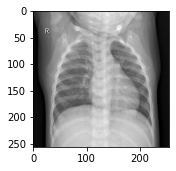

In [ ]:
# Previsão através de uma imagem
imagem_pasta = "./covid19/train/NORMAL/IM-0122-0001.jpeg"
imagem_cor = cv2.resize(cv2.imread(imagem_pasta, cv2.IMREAD_COLOR), (nlinhas,ncolunas), interpolation=cv2.INTER_CUBIC)
#imagem_peb = cv2.cvtColor(imagem_cor, cv2.COLOR_BGR2GRAY)
#tf.expand_dims(
imagem = tf.expand_dims(np.array(imagem_cor).astype("float32") / 255, 0)
    #,3)
pred = model.predict(imagem)
pred = np.argmax(pred)
doencas = ["Normal", "Pneumonia", "Covid"]
plt.figure(figsize=(5,2.5))
plt.imshow(imagem_cor)
print("Através do raio-x previu-se ser " + doencas[pred] + ".")

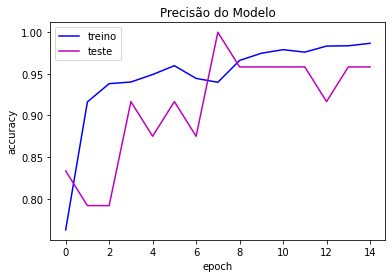

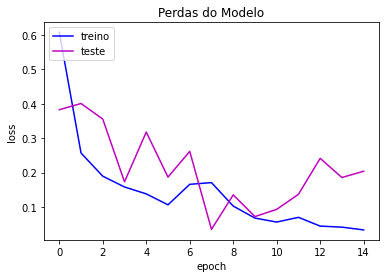

In [ ]:
# precisão (treino/teste)
acc=np.array(hist.history['accuracy'])
plt.plot(acc,'b')
plt.plot(hist.history['val_accuracy'],'m')
plt.title('Precisão do Modelo')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()
# perdas (treino/teste)
loss=np.array(hist.history['loss'])
plt.plot(loss,'b',label='train')
plt.plot(hist.history['val_loss'],'m',label='test')
plt.title('Perdas do Modelo')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()

Matriz de Confusão (Treino)
Dados Treino accuracy: 99.83%
              precision    recall  f1-score   support

           0     0.9987    0.9987    0.9987      1583
           1     0.9955    0.9970    0.9963       672
           2     1.0000    0.9987    0.9993       755

    accuracy                         0.9983      3010
   macro avg     0.9981    0.9981    0.9981      3010
weighted avg     0.9983    0.9983    0.9983      3010



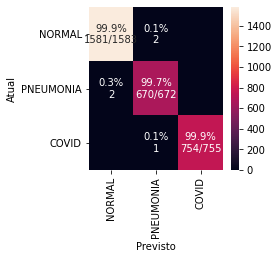

Matriz de Confusão (Teste)
Dados Validação accuracy: 95.83%
              precision    recall  f1-score   support

           0     0.8889    1.0000    0.9412         8
           1     1.0000    1.0000    1.0000         8
           2     1.0000    0.8750    0.9333         8

    accuracy                         0.9583        24
   macro avg     0.9630    0.9583    0.9582        24
weighted avg     0.9630    0.9583    0.9582        24



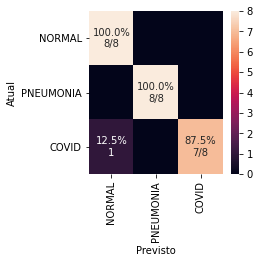

In [ ]:
# matriz de confusão (Treino)
print('Matriz de Confusão (Treino)')
cm=confusion_matrix(np.argmax(y_train,axis=1), np.argmax(model.predict(X_train),axis=1))
scores = model.evaluate(X_train,y_train, verbose=0)
print("Dados Treino %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

pred = model.predict(X_train)
predicted = np.argmax(pred, axis=1)
report = classification_report(np.argmax(y_train, axis=1), predicted,digits=4)
print(report)


def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(3,3)):
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Atual'
    cm.columns.name = 'Previsto'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    plt.show()



cm_analysis(np.argmax(y_train, axis=1), predicted,
            labels=["NORMAL","PNEUMONIA", "COVID"], ymap=None, figsize=(3,3))


# matriz de confusão (Teste)
print('Matriz de Confusão (Teste)')
cm=confusion_matrix(np.argmax(y_test,axis=1), np.argmax(model.predict(X_test),axis=1))
scores = model.evaluate(X_test,y_test, verbose=0)
print("Dados Validação %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

pred = model.predict(X_test)
predicted = np.argmax(pred, axis=1)
report = classification_report(np.argmax(y_test, axis=1), predicted,digits=4)
print(report)


def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(3,3)):
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Atual'
    cm.columns.name = 'Previsto'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    plt.show()



cm_analysis(np.argmax(y_test, axis=1), predicted,
            labels=["NORMAL","PNEUMONIA", "COVID"], ymap=None, figsize=(3,3))